In [34]:
import pandas as pd

In [35]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Age of the house the moment it was sold Vs it price

In [37]:
df_ = df[df['yr_renovated']==0][['id','yr_built','date','price','yr_renovated']].copy()

def get_age(end_year, start_year):
    if start_year ==0:
        return 'n/a'
    return end_year - start_year


df_['age (sold - built)'] = df_.apply(lambda row: get_age(
    pd.to_datetime(row['date']).year, row['yr_built']), axis=1)


df_.sort_values('age (sold - built)').head(10)

,id,yr_built,date,price,yr_renovated,age (sold - built),age (sold - renovation)
17098,9126100346,2015,20140617T000000,350000.0,0,-1,n/a
20963,6058600220,2015,20140731T000000,230000.0,0,-1,n/a
2687,3076500830,2015,20141029T000000,385195.0,0,-1,n/a
20852,1257201420,2015,20140709T000000,595000.0,0,-1,n/a
14489,2770601530,2015,20140826T000000,500000.0,0,-1,n/a
21372,6169901185,2015,20140520T000000,490000.0,0,-1,n/a
7526,9520900210,2015,20141231T000000,614285.0,0,-1,n/a
8039,1250200495,2015,20140624T000000,455000.0,0,-1,n/a
19805,9126100765,2015,20140801T000000,455000.0,0,-1,n/a
20770,9310300160,2015,20140828T000000,357000.0,0,-1,n/a


In [38]:
df_[df_['age (sold - built)']<0]

,id,yr_built,date,price,yr_renovated,age (sold - built),age (sold - renovation)
1763,1832100030,2015,20140625T000000,597326.0,0,-1,n/a
2687,3076500830,2015,20141029T000000,385195.0,0,-1,n/a
7526,9520900210,2015,20141231T000000,614285.0,0,-1,n/a
8039,1250200495,2015,20140624T000000,455000.0,0,-1,n/a
14489,2770601530,2015,20140826T000000,500000.0,0,-1,n/a
17098,9126100346,2015,20140617T000000,350000.0,0,-1,n/a
19805,9126100765,2015,20140801T000000,455000.0,0,-1,n/a
20770,9310300160,2015,20140828T000000,357000.0,0,-1,n/a
20852,1257201420,2015,20140709T000000,595000.0,0,-1,n/a
20963,6058600220,2015,20140731T000000,230000.0,0,-1,n/a


In [44]:
# Replace negative age (sold - built) values by 0 to get a clean data set and avoid distortions

df_['age (sold - built)'] = df_.apply(lambda row: 0 if row['age (sold - built)']<0 else row['age (sold - built)'],axis=1)


In [45]:
[df['date'].min(),df['date'].max()]

['20140502T000000', '20150527T000000']

In [40]:
df_ages_intervals = pd.cut(df_['age (sold - built)'], bins=10)

df_agg = df_.groupby(df_ages_intervals)[['price']].agg(['min', 'mean', 'max'])
df_agg


price                          
                         min           mean        max
age (sold - built)                                    
(-0.115, 11.5]      155000.0  608240.557356  5350000.0
(11.5, 23.0]        154000.0  608206.377386  6890000.0
(23.0, 34.5]        115000.0  531732.727665  5300000.0
(34.5, 46.0]         89000.0  474720.119958  3800000.0
(46.0, 57.5]         75000.0  447525.569588  3070000.0
(57.5, 69.0]         82000.0  457169.313086  3400000.0
(69.0, 80.5]         78000.0  446264.874046  3650000.0
(80.5, 92.0]        105500.0  595739.866543  3000000.0
(92.0, 103.5]        80000.0  542975.354223  2500000.0
(103.5, 115.0]       90000.0  609218.365243  3300000.0

<Axes: title={'center': 'Relationship between sqft living and bedrooms'}, xlabel='age (sold - built)'>

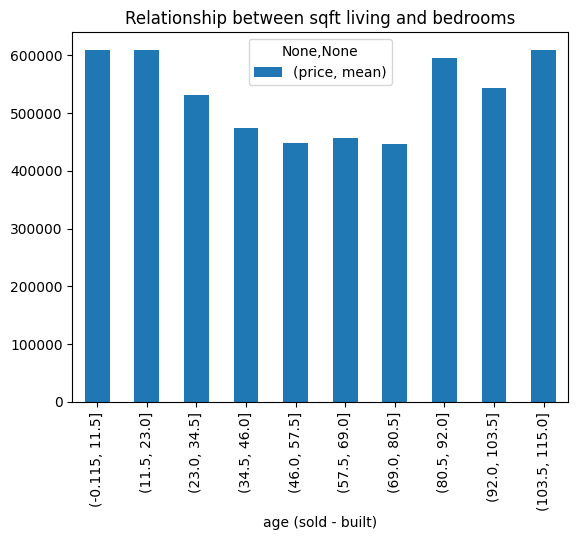

In [43]:
import matplotlib

df_agg.reset_index(inplace=True)

df_agg.plot.bar(x='age (sold - built)', y=('price','mean'),title="Relationship between sqft living and bedrooms")